# ENEM 2019

Este notebook se refere ao Desafio Final do Treinamento Básico em Data Science efetuado pela Academy Semantix entre agosto de 2021 e novembro de 2021.

Os dados para análise estão disponíveis em https://www.gov.br/inep/pt-br/acesso-a-informacao/dados-abertos/microdados/enem

Criado em 1998 o Enem teve por princípio avaliar anualmente o aprendizado dos alunos do ensino médio em todo o país.

O primeiro modelo de prova do Enem, utilizado entre 1998 e 2008, tinha 63 questões aplicadas em um dia de prova. A prova passou, a partir de 2004, a servir para ingresso em cursos superiores no caso de candidatos que, com a nota do exame, se inscrevessem para conseguir bolsa de estudo em faculdades particulares pelo ProUni. 

O Enem 2019 sofreu mudanças que fazem parte de um processo de otimização e de redução de custos de realização. O Edital informou mudanças ligadas à coleta de dado biométrico, que passaria a utilizar uma esponja de múltiplo uso; e uma nova diagramação do caderno de provas, que passa a contar com um espaço em branco ao final, para fins de cálculos e da elaboração do rascunho da redação. 

Somente 53 estudantes tiraram nota mil, tendo em sua maioria mulheres e com destaque a região sudeste com 45,3%, seguido do nordeste com 32%. 

O estado com o maior número de notas máximas foi Minas Gerais com 13 candidatos. 

Já o total de notas zero foi de 143.736, com 56 mil folhas em branco. 
(https://pt.wikipedia.org/wiki/Exame_Nacional_do_Ensino_M%C3%A9dio)

A seguir minidicionário relativo aos dados do Enem 2019 utilizado neste notebook

NU_NOTA_CN ==> Nota da prova de Ciências da Natureza
NU_NOTA_CH ==> Nota da prova de Ciências Humanas
NU_NOTA_LC ==> Nota da prova de Linguagens e Códigos
NU_NOTA_MT ==> Nota da prova de Matemática
NU_NOTA_REDACAO ==> Nota da prova de redação

SG_UF_RESIDENCIA ==> Sigla da Unidade da Federação de Residência

NU_IDADE ==> Idade
TP_SEXO ==> Sexo

TP_ESTADO_CIVIL ==>	Estado Civil
        0	Não informado
		1	Solteiro(a)
		2	Casado(a)/Mora com companheiro(a)
		3	Divorciado(a)/Desquitado(a)/Separado(a)
		4	Viúvo(a)

TP_COR_RACA	==> Cor/raça
        0	Não declarado
		1	Branca
		2	Preta
		3	Parda
		4	Amarela
		5	Indígena 

TP_NACIONALIDADE ==> Nacionalidade	
        0	Não informado
		1	Brasileiro(a)
		2	Brasileiro(a) Naturalizado(a)
		3	Estrangeiro(a)
		4	Brasileiro(a) Nato(a), nascido(a) no exterior

IN_NOME_SOCIAL ==> Indicador de inscrito que se declarou travesti, transexual ou transgênero e solicitou atendimento pelo Nome Social, conforme é reconhecido socialmente em consonância com sua identidade de gênero
IN_CEGUEIRA ==> Indicador de Cegueira
IN_GESTANTE ==> Indicador de Gestante
IN_LACTANTE ==> Indicador de Lactante
IN_IDOSO ==> Indicador de Inscrito Idoso

TP_LINGUA ==> Língua Estrangeira 	
        0	Inglês
		1	Espanhol


Q006 ==> Renda Mensal Familiar
        A	Nenhuma renda.
		B	Até R$ 998,00.
		C	De R$ 998,01 até R$ 1.497,00.
		D	De R$ 1.497,01 até R$ 1.996,00.
		E	De R$ 1.996,01 até R$ 2.495,00.
		F	De R$ 2.495,01 até R$ 2.994,00.
		G	De R$ 2.994,01 até R$ 3.992,00.
		H	De R$ 3.992,01 até R$ 4.990,00.
		I	De R$ 4.990,01 até R$ 5.988,00.
		J	De R$ 5.988,01 até R$ 6.986,00.
		K	De R$ 6.986,01 até R$ 7.984,00.
		L	De R$ 7.984,01 até R$ 8.982,00.
		M	De R$ 8.982,01 até R$ 9.980,00.
		N	De R$ 9.980,01 até R$ 11.976,00.
		O	De R$ 11.976,01 até R$ 14.970,00.
		P	De R$ 14.970,01 até R$ 19.960,00.
		Q	Mais de R$ 19.960,00.

Q025	Residência com acesso à Internet
        A	Não.
		B	Sim.


Entre diversas informações e visualizações ao longo deste Notebook encontramos as seguintes informações obtidas a partir da base de dados Enem2019.

1 - Das 1410 candidatas inscritas como gestante, aproximadamente ao redor de mil candidatas não compareceram às provas e quatro delas tinham 15 anos de idade.

2 - Dos candidatos(as) inscritos(as) com cegueira cerca de 20% não compareceram às provas

3 - Haviam 6(seis) candidatas(os) com 10 anos de idade e 9(nove) com 11 anos de idade inscritas no Enem-2019

4 - Entre diveros idosos inscritos, havia um candidato com 94 anos de idade

5 - Há evidência estatística de que quanto maior a renda familiar maior foi Nota Total na prova do Enem-2019 

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('MICRODADOS_ENEM_2019.csv', encoding='ISO-8859-1', sep=';')
df.head()

,NU_INSCRICAO,NU_ANO,CO_MUNICIPIO_RESIDENCIA,NO_MUNICIPIO_RESIDENCIA,CO_UF_RESIDENCIA,SG_UF_RESIDENCIA,NU_IDADE,TP_SEXO,TP_ESTADO_CIVIL,TP_COR_RACA,...,Q016,Q017,Q018,Q019,Q020,Q021,Q022,Q023,Q024,Q025
0,190001595656,2019,3552205,Sorocaba,35,SP,36.0,M,1,3,...,A,A,A,A,A,A,C,A,C,B
1,190001421546,2019,2910800,Feira de Santana,29,BA,23.0,M,1,1,...,A,A,A,B,A,A,E,A,A,B
2,190001133210,2019,2304400,Fortaleza,23,CE,39.0,F,1,3,...,A,A,A,B,A,A,C,A,A,B
3,190001199383,2019,1721000,Palmas,17,TO,25.0,F,1,1,...,A,A,A,C,A,B,D,A,B,B
4,190001237802,2019,3118601,Contagem,31,MG,22.0,F,1,1,...,B,A,A,B,A,A,C,B,B,B


In [3]:
df.shape

(5095270, 136)

In [4]:
colunas = ['SG_UF_RESIDENCIA','NU_IDADE', 'TP_SEXO', 'TP_ESTADO_CIVIL', 'TP_COR_RACA',
       'TP_NACIONALIDADE','IN_CEGUEIRA', 'IN_GESTANTE',
       'IN_LACTANTE', 'IN_IDOSO','IN_NOME_SOCIAL', 'NU_NOTA_CN', 'NU_NOTA_CH', 'NU_NOTA_LC',
       'NU_NOTA_MT','TP_LINGUA','NU_NOTA_REDACAO', 'Q006', 'Q025', 'TP_PRESENCA_MT', 'TP_PRESENCA_CH', 'TP_PRESENCA_CN', 'TP_PRESENCA_LC']

In [5]:
subset2 = df.filter(items=colunas)

In [6]:
subset2.head()

,SG_UF_RESIDENCIA,NU_IDADE,TP_SEXO,TP_ESTADO_CIVIL,TP_COR_RACA,TP_NACIONALIDADE,IN_CEGUEIRA,IN_GESTANTE,IN_LACTANTE,IN_IDOSO,...,NU_NOTA_LC,NU_NOTA_MT,TP_LINGUA,NU_NOTA_REDACAO,Q006,Q025,TP_PRESENCA_MT,TP_PRESENCA_CH,TP_PRESENCA_CN,TP_PRESENCA_LC
0,SP,36.0,M,1,3,1,0,0,0,0,...,NaN,NaN,0,NaN,A,B,0,0,0,0
1,BA,23.0,M,1,1,1,0,0,0,0,...,NaN,NaN,0,NaN,C,B,0,0,0,0
2,CE,39.0,F,1,3,1,0,0,0,0,...,NaN,NaN,1,NaN,B,B,0,0,0,0
3,TO,25.0,F,1,1,1,0,0,0,0,...,537.3,392.0,1,460.0,E,B,1,1,1,1
4,MG,22.0,F,1,1,1,0,0,0,0,...,570.7,677.0,0,860.0,G,B,1,1,1,1


In [7]:
subset2.shape

(5095270, 23)

In [8]:
subset2.columns.values

array(['SG_UF_RESIDENCIA', 'NU_IDADE', 'TP_SEXO', 'TP_ESTADO_CIVIL',
       'TP_COR_RACA', 'TP_NACIONALIDADE', 'IN_CEGUEIRA', 'IN_GESTANTE',
       'IN_LACTANTE', 'IN_IDOSO', 'IN_NOME_SOCIAL', 'NU_NOTA_CN',
       'NU_NOTA_CH', 'NU_NOTA_LC', 'NU_NOTA_MT', 'TP_LINGUA',
       'NU_NOTA_REDACAO', 'Q006', 'Q025', 'TP_PRESENCA_MT',
       'TP_PRESENCA_CH', 'TP_PRESENCA_CN', 'TP_PRESENCA_LC'], dtype=object)

In [9]:
subset2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5095270 entries, 0 to 5095269
Data columns (total 23 columns):
 #   Column            Dtype  
---  ------            -----  
 0   SG_UF_RESIDENCIA  object 
 1   NU_IDADE          float64
 2   TP_SEXO           object 
 3   TP_ESTADO_CIVIL   int64  
 4   TP_COR_RACA       int64  
 5   TP_NACIONALIDADE  int64  
 6   IN_CEGUEIRA       int64  
 7   IN_GESTANTE       int64  
 8   IN_LACTANTE       int64  
 9   IN_IDOSO          int64  
 10  IN_NOME_SOCIAL    int64  
 11  NU_NOTA_CN        float64
 12  NU_NOTA_CH        float64
 13  NU_NOTA_LC        float64
 14  NU_NOTA_MT        float64
 15  TP_LINGUA         int64  
 16  NU_NOTA_REDACAO   float64
 17  Q006              object 
 18  Q025              object 
 19  TP_PRESENCA_MT    int64  
 20  TP_PRESENCA_CH    int64  
 21  TP_PRESENCA_CN    int64  
 22  TP_PRESENCA_LC    int64  
dtypes: float64(6), int64(13), object(4)
memory usage: 894.1+ MB


In [10]:
import warnings
warnings.filterwarnings('ignore')

In [11]:
#variáveis qualitativas
var_quali = ['object']
qualitativas = list(subset2.select_dtypes(include=var_quali).columns)
qualitativas

['SG_UF_RESIDENCIA', 'TP_SEXO', 'Q006', 'Q025']

SG_UF_RESIDENCIA ==> Sigla da Unidade da Federação de Residência

Q006 ==> Renda Mensal Familiar
        A	Nenhuma renda.
		B	Até R$ 998,00.
		C	De R$ 998,01 até R$ 1.497,00.
		D	De R$ 1.497,01 até R$ 1.996,00.
		E	De R$ 1.996,01 até R$ 2.495,00.
		F	De R$ 2.495,01 até R$ 2.994,00.
		G	De R$ 2.994,01 até R$ 3.992,00.
		H	De R$ 3.992,01 até R$ 4.990,00.
		I	De R$ 4.990,01 até R$ 5.988,00.
		J	De R$ 5.988,01 até R$ 6.986,00.
		K	De R$ 6.986,01 até R$ 7.984,00.
		L	De R$ 7.984,01 até R$ 8.982,00.
		M	De R$ 8.982,01 até R$ 9.980,00.
		N	De R$ 9.980,01 até R$ 11.976,00.
		O	De R$ 11.976,01 até R$ 14.970,00.
		P	De R$ 14.970,01 até R$ 19.960,00.
		Q	Mais de R$ 19.960,00.

Q025	Residência com acesso à Internet
        A	Não.
		B	Sim.

In [12]:
df_quali = df[qualitativas]
df_quali.head()

,SG_UF_RESIDENCIA,TP_SEXO,Q006,Q025
0,SP,M,A,B
1,BA,M,C,B
2,CE,F,B,B
3,TO,F,E,B
4,MG,F,G,B


In [16]:
import seaborn as sns

SG_UF_RESIDENCIA


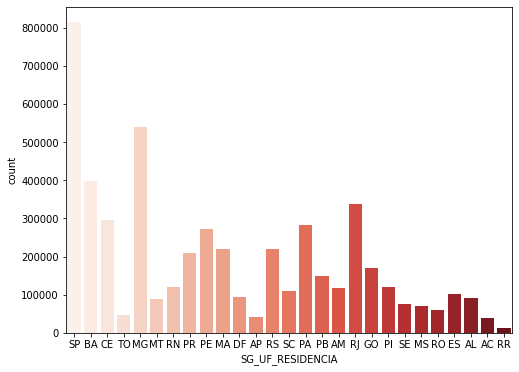

TP_SEXO


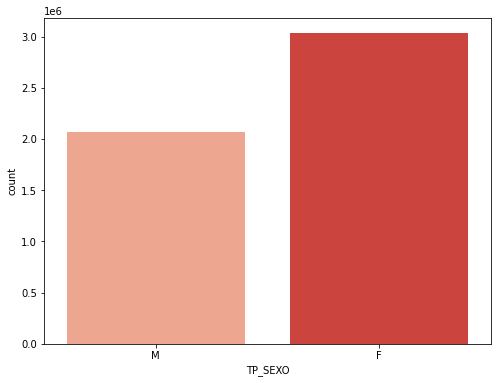

Q006


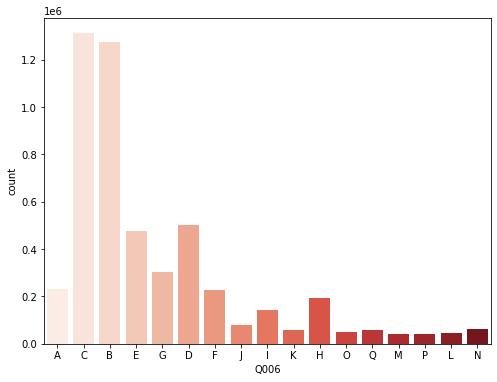

Q025


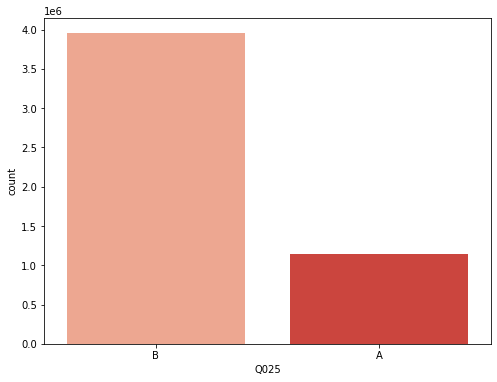

In [17]:
for var_quali in df_quali:
  print(var_quali)
  plt.figure(figsize = (8, 6))
  sns.countplot(df_quali[var_quali], palette='Reds')
  plt.show();

In [18]:
subset2.isnull().sum()

SG_UF_RESIDENCIA          0
NU_IDADE                 69
TP_SEXO                   0
TP_ESTADO_CIVIL           0
TP_COR_RACA               0
TP_NACIONALIDADE          0
IN_CEGUEIRA               0
IN_GESTANTE               0
IN_LACTANTE               0
IN_IDOSO                  0
IN_NOME_SOCIAL            0
NU_NOTA_CN          1384837
NU_NOTA_CH          1172125
NU_NOTA_LC          1172125
NU_NOTA_MT          1384837
TP_LINGUA                 0
NU_NOTA_REDACAO     1172126
Q006                      0
Q025                      0
TP_PRESENCA_MT            0
TP_PRESENCA_CH            0
TP_PRESENCA_CN            0
TP_PRESENCA_LC            0
dtype: int64

In [19]:
subset2.nunique()

SG_UF_RESIDENCIA      27
NU_IDADE              82
TP_SEXO                2
TP_ESTADO_CIVIL        5
TP_COR_RACA            6
TP_NACIONALIDADE       5
IN_CEGUEIRA            2
IN_GESTANTE            2
IN_LACTANTE            2
IN_IDOSO               2
IN_NOME_SOCIAL         2
NU_NOTA_CN          4688
NU_NOTA_CH          4684
NU_NOTA_LC          4124
NU_NOTA_MT          6011
TP_LINGUA              2
NU_NOTA_REDACAO       50
Q006                  17
Q025                   2
TP_PRESENCA_MT         3
TP_PRESENCA_CH         3
TP_PRESENCA_CN         3
TP_PRESENCA_LC         3
dtype: int64

In [20]:
import numpy as np
import missingno as msno

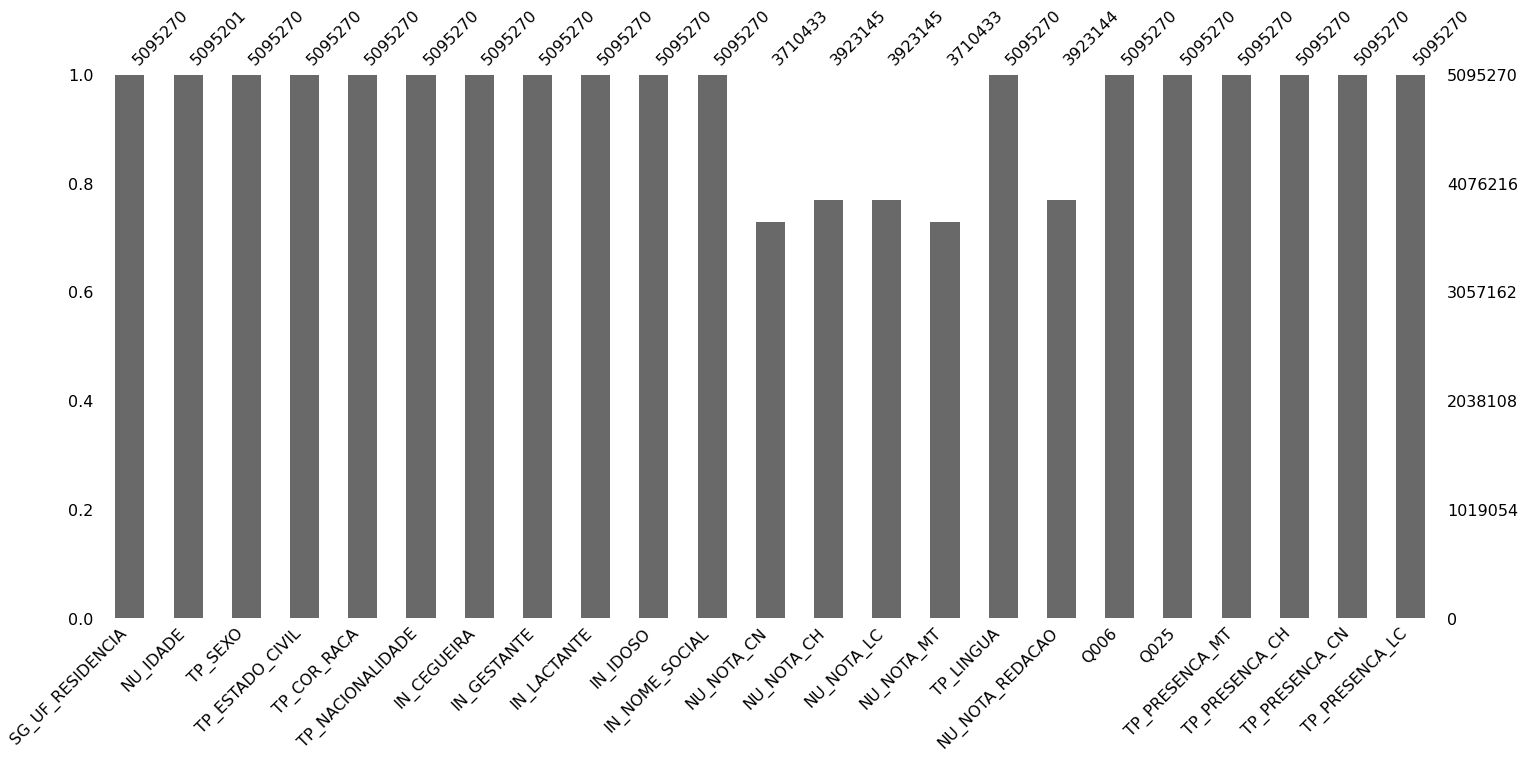

In [21]:
#plotando quantidades de dados em cada variável
msno.bar(subset2);

Há muitos dados faltantes nas Notas das Provas, que podem ter sido causados por ausência à Prova. Esses dados serão substituídos pela Mediana da Variável em análise.

In [22]:
subset2.loc[(df['NU_NOTA_CN'].isnull() == True), 'NU_NOTA_CN'] = df['NU_NOTA_CN'].median()

In [23]:
subset2.loc[(df['NU_NOTA_CH'].isnull() == True), 'NU_NOTA_CH'] = df['NU_NOTA_CH'].median()

In [24]:
subset2.loc[(df['NU_NOTA_LC'].isnull() == True), 'NU_NOTA_LC'] = df['NU_NOTA_LC'].median()

In [25]:
subset2.loc[(df['NU_NOTA_MT'].isnull() == True), 'NU_NOTA_MT'] = df['NU_NOTA_MT'].median()

In [26]:
subset2.loc[(df['NU_NOTA_REDACAO'].isnull() == True), 'NU_NOTA_REDACAO'] = df['NU_NOTA_REDACAO'].median()

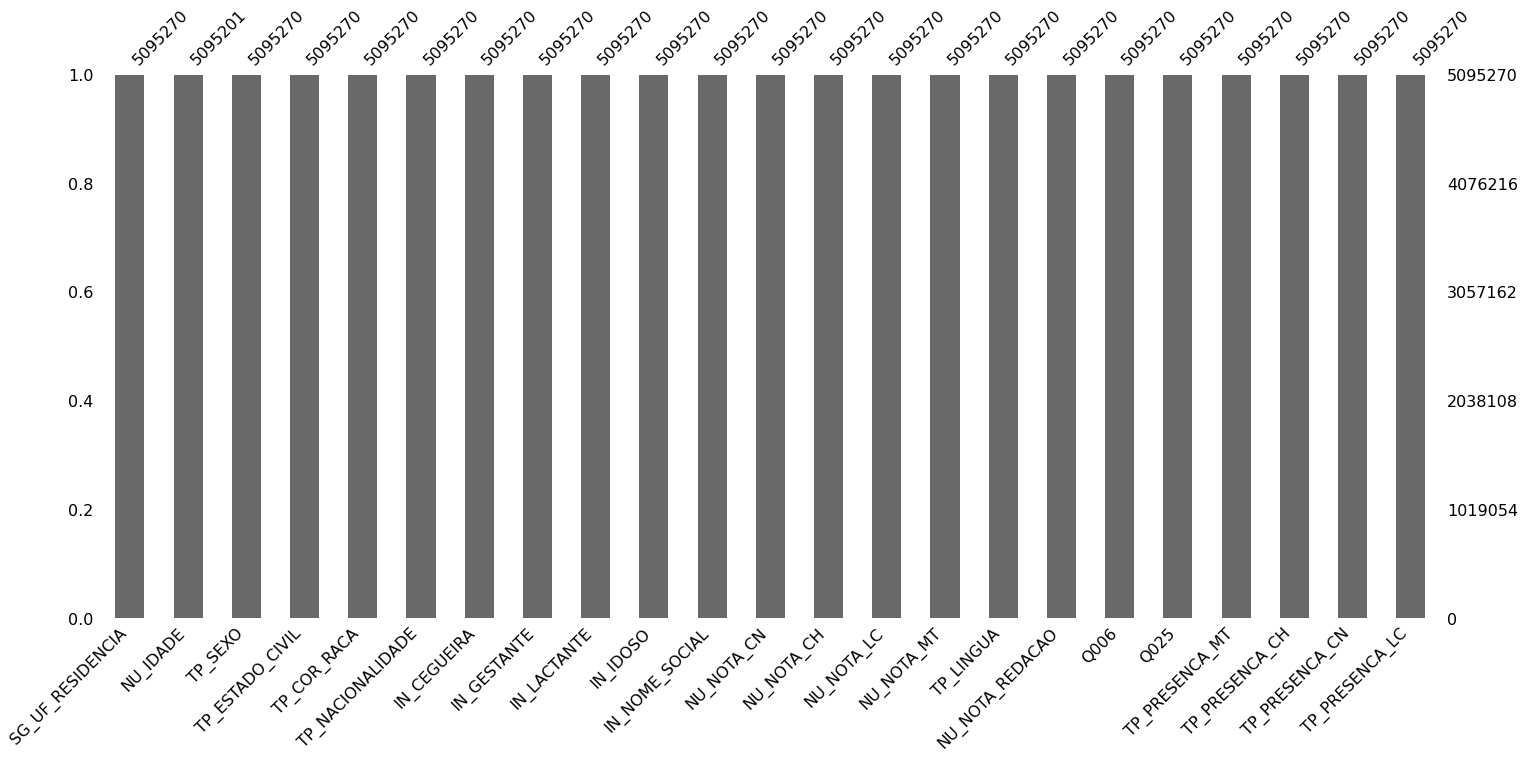

In [27]:
#plotando quantidades de dados em cada variável
msno.bar(subset2);

Verificando total de Candidatas grávidas inscritas no Enem 2019 e seu comparecimento às Provas

In [28]:
subset2[['IN_GESTANTE']].value_counts().sort_index()

IN_GESTANTE
0              5093860
1                 1410
dtype: int64

In [29]:
# das 1410 inscritas que declararam gestantes, compareceram 410 para fazer a Prova Ciências da Natureza
subset2.query('IN_GESTANTE==1')['TP_PRESENCA_CN'].value_counts()

0    999
1    410
2      1
Name: TP_PRESENCA_CN, dtype: int64

In [30]:
subset2.query('IN_GESTANTE==1')['TP_PRESENCA_CH'].value_counts()

0    906
1    501
2      3
Name: TP_PRESENCA_CH, dtype: int64

In [31]:
subset2.query('IN_GESTANTE==1')['TP_PRESENCA_LC'].value_counts()

0    906
1    501
2      3
Name: TP_PRESENCA_LC, dtype: int64

In [32]:
subset2.query('IN_GESTANTE==1')['TP_PRESENCA_MT'].value_counts()

0    999
1    410
2      1
Name: TP_PRESENCA_MT, dtype: int64

Verificando total de Candidata (o) s com cegueira inscritos no Enem 2019 e comparecimento às Provas

IN_CEGUEIRA Indicador de cegueira
            1 = Sim
            0 = Não


In [33]:
subset2['IN_CEGUEIRA'].value_counts()

0    5094555
1        715
Name: IN_CEGUEIRA, dtype: int64

In [34]:
subset2.query('IN_CEGUEIRA == 1')['TP_PRESENCA_CN'].value_counts().sort_index()

0    173
1    542
Name: TP_PRESENCA_CN, dtype: int64

In [35]:
subset2.query('IN_CEGUEIRA == 1')['TP_PRESENCA_CH'].value_counts().sort_index()

0    143
1    571
2      1
Name: TP_PRESENCA_CH, dtype: int64

In [36]:
subset2.query('IN_CEGUEIRA == 1')['TP_PRESENCA_LC'].value_counts().sort_index()

0    143
1    571
2      1
Name: TP_PRESENCA_LC, dtype: int64

In [37]:
subset2.query('IN_CEGUEIRA == 1')['TP_PRESENCA_MT'].value_counts().sort_index()

0    173
1    542
Name: TP_PRESENCA_MT, dtype: int64

In [38]:
len(subset2['SG_UF_RESIDENCIA'].unique())

27

In [39]:
subset2['SG_UF_RESIDENCIA'].unique()

array(['SP', 'BA', 'CE', 'TO', 'MG', 'MT', 'RN', 'PR', 'PE', 'MA', 'DF',
       'AP', 'RS', 'SC', 'PA', 'PB', 'AM', 'RJ', 'GO', 'PI', 'SE', 'MS',
       'RO', 'ES', 'AL', 'AC', 'RR'], dtype=object)

In [40]:
#Verificando idade da Candidata Grávida
gravidez = subset2.query('IN_GESTANTE == 1')['NU_IDADE'].value_counts().sort_index()
gravidez

15.0      4
16.0      8
17.0     77
18.0    148
19.0    159
20.0    127
21.0    109
22.0     86
23.0     73
24.0     87
25.0     88
26.0     56
27.0     68
28.0     39
29.0     37
30.0     35
31.0     33
32.0     27
33.0     35
34.0     24
35.0     24
36.0     18
37.0     10
38.0     11
39.0      9
40.0      9
41.0      3
42.0      1
43.0      3
45.0      2
Name: NU_IDADE, dtype: int64

In [41]:
subset2['NU_IDADE'].value_counts().sort_index()

10.0       6
11.0       9
12.0      46
13.0     266
14.0    5267
        ... 
87.0       1
88.0       1
91.0       2
92.0       1
94.0       1
Name: NU_IDADE, Length: 82, dtype: int64

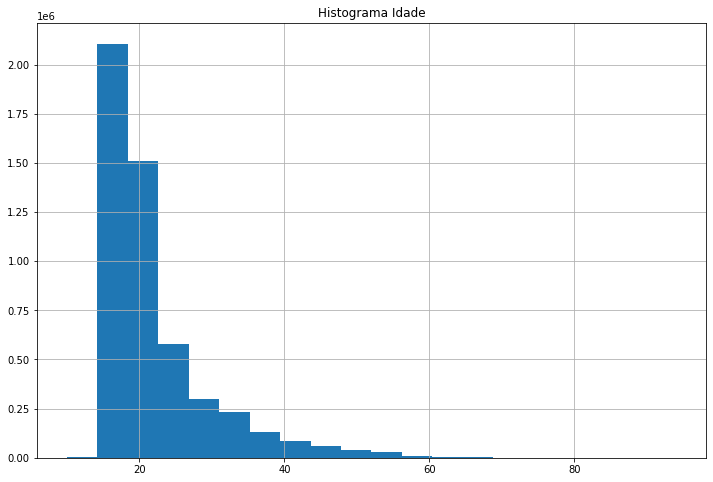

In [42]:
#plotando o histograma por idade
fig, ax = plt.subplots()
subset2['NU_IDADE'].hist(bins = 20, figsize = (12,8))
ax.set_title('Histograma Idade');

TP_COR_RACA	==> Cor/raça
        0	Não declarado
		1	Branca
		2	Preta
		3	Parda
		4	Amarela
		5	Indígena

In [53]:
#Verificando a Unidade de Federação dos Candidatos com 10 (dez) anos de idade
subset2.query('NU_IDADE == 10')

,SG_UF_RESIDENCIA,NU_IDADE,TP_SEXO,TP_ESTADO_CIVIL,TP_COR_RACA,TP_NACIONALIDADE,IN_CEGUEIRA,IN_GESTANTE,IN_LACTANTE,IN_IDOSO,...,NU_NOTA_LC,NU_NOTA_MT,TP_LINGUA,NU_NOTA_REDACAO,Q006,Q025,TP_PRESENCA_MT,TP_PRESENCA_CH,TP_PRESENCA_CN,TP_PRESENCA_LC
2601640,MA,10.0,F,1,2,1,0,0,0,0,...,526.2,501.1,1,580.0,B,A,0,0,0,0
3156122,SC,10.0,F,1,1,1,0,0,0,0,...,590.5,709.0,0,840.0,L,B,1,1,1,1
3422901,AM,10.0,M,1,3,1,0,0,0,0,...,469.7,368.1,0,420.0,D,B,1,1,1,1
3723745,PE,10.0,F,1,3,1,0,0,0,0,...,492.6,531.4,0,600.0,F,B,1,1,1,1
4020516,MS,10.0,F,1,3,1,0,0,0,0,...,468.3,519.9,0,840.0,D,B,1,1,1,1
4756734,MG,10.0,M,1,1,1,0,0,0,0,...,499.0,522.2,0,560.0,J,B,1,1,1,1


# Vamos verificar gráficos das Notas de algumas Disciplinas

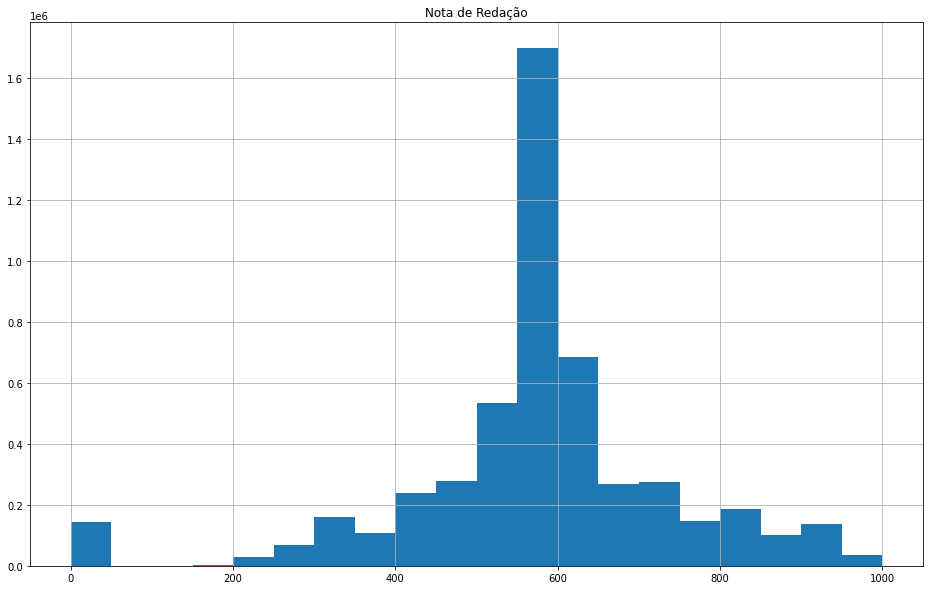

In [46]:
fig, ax = plt.subplots()
subset2['NU_NOTA_REDACAO'].hist(bins = 20, figsize = (16,10))
ax.set_title("Nota de Redação");

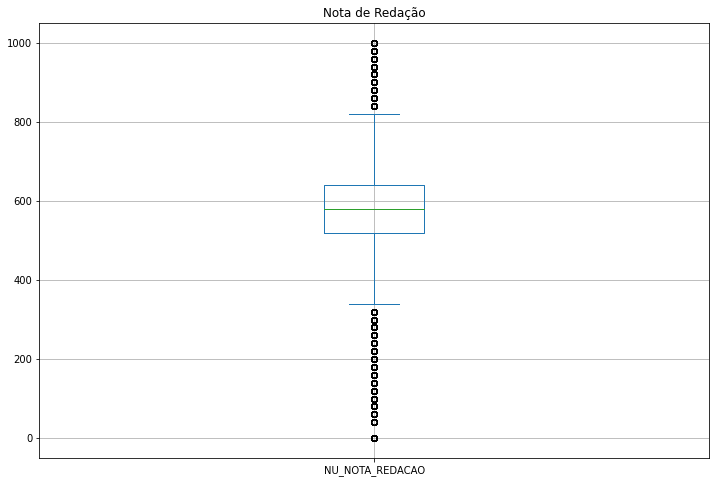

In [47]:
#procurando outliers na Nota de Redação
fig, ax = plt.subplots()
subset2['NU_NOTA_REDACAO'].plot.box(grid = True, figsize = (12,8))
ax.set_title("Nota de Redação");

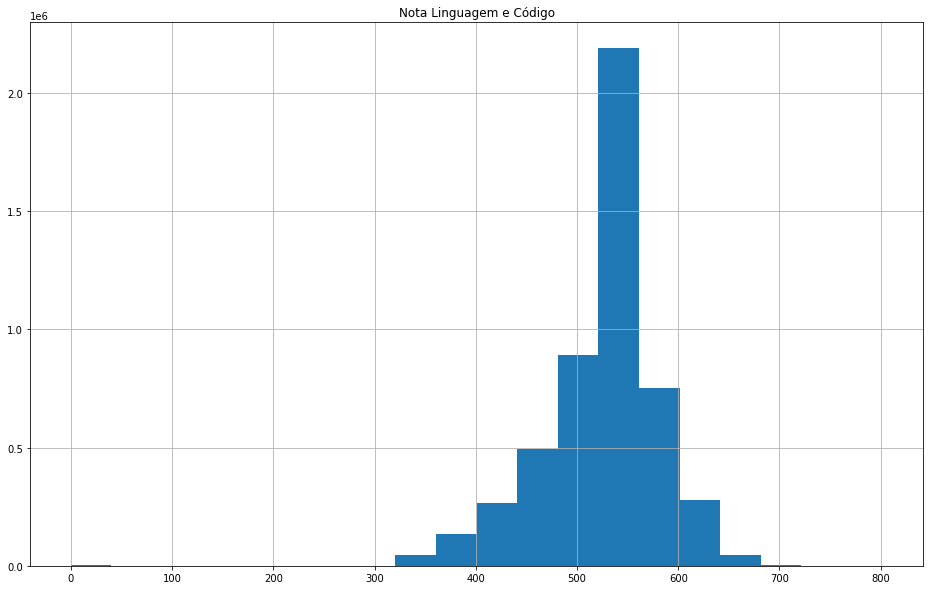

In [48]:
fig, ax = plt.subplots()
subset2['NU_NOTA_LC'].hist(bins = 20, figsize = (16,10))
ax.set_title("Nota Linguagem e Código");

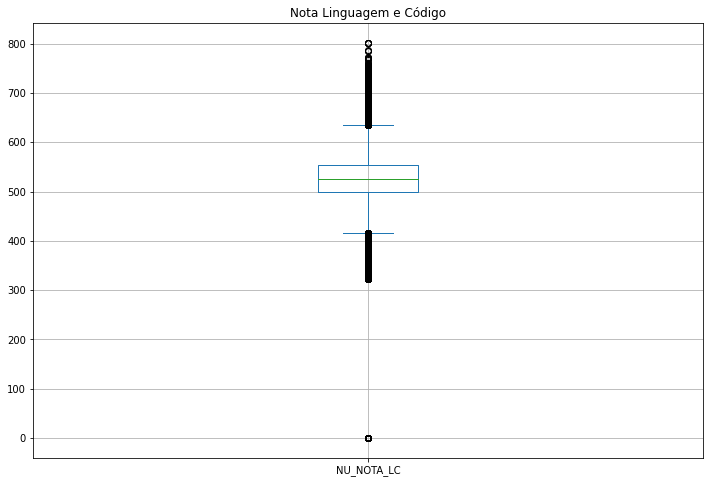

In [49]:
#procurando outliers na Nota de Linguagem e Código
fig, ax = plt.subplots()
subset2['NU_NOTA_LC'].plot.box(grid = True, figsize = (12,8))
ax.set_title("Nota Linguagem e Código");

Analisando Notas de um Grupo de Disciplinas (Redação, Ciências da Natureza=CN, Ciências Humanas=CH, Matemática=MT, Linguagens e Códigos=LC)


In [50]:
notas = ['NU_NOTA_CN', 'NU_NOTA_CH', 'NU_NOTA_MT', 'NU_NOTA_LC', 'NU_NOTA_REDACAO'] 

round(subset2[notas].describe()).T

,count,mean,std,min,25%,50%,75%,max
NU_NOTA_CN,5095270.0,476.0,65.0,0.0,437.0,470.0,508.0,861.0
NU_NOTA_CH,5095270.0,508.0,72.0,0.0,468.0,511.0,550.0,835.0
NU_NOTA_MT,5095270.0,517.0,94.0,0.0,458.0,501.0,557.0,986.0
NU_NOTA_LC,5095270.0,522.0,56.0,0.0,498.0,526.0,553.0,802.0
NU_NOTA_REDACAO,5095270.0,573.0,166.0,0.0,520.0,580.0,640.0,1000.0


NU_NOTA_CN ==> Nota da prova de Ciências da Natureza
NU_NOTA_CH ==> Nota da prova de Ciências Humanas
NU_NOTA_MT ==> Nota da prova de Matemática
NU_NOTA_LC ==> Nota da prova de Linguagens e Códigos
NU_NOTA_REDACAO ==> Nota da prova de redação

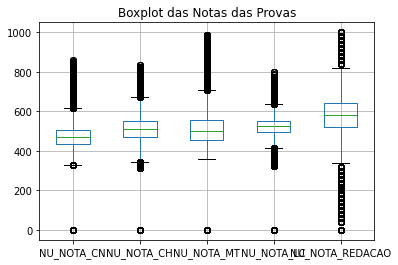

In [51]:
fig, ax = plt.subplots()
subset2[notas].boxplot(grid=True, figsize = (24, 12))
ax.set_title("Boxplot das Notas das Provas");

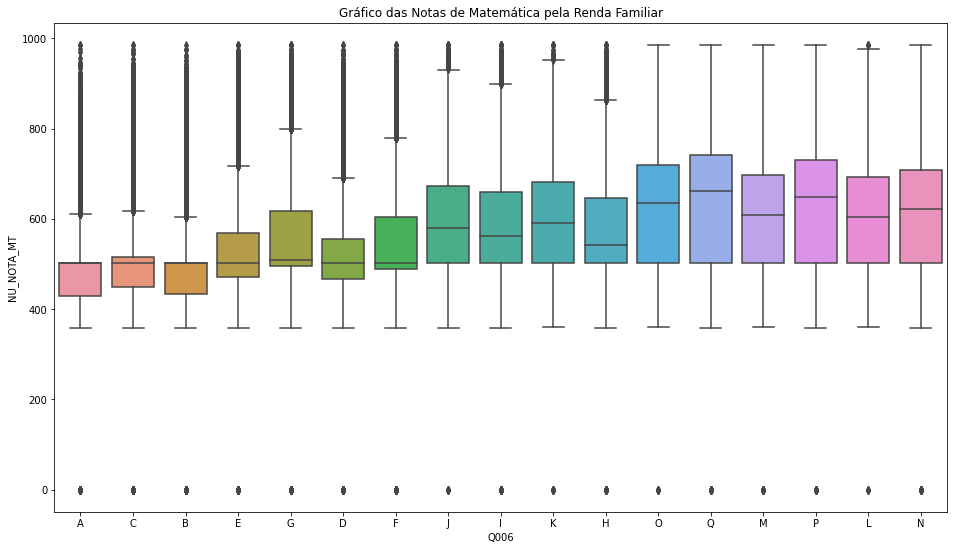

In [54]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(16,9))

sns.boxplot(x = 'Q006', y='NU_NOTA_MT', data = subset2)
plt.title('Gráfico das Notas de Matemática pela Renda Familiar');

Q006 ==> Renda Mensal Familiar
        A	Nenhuma renda.
		B	Até R$ 998,00.
		C	De R$ 998,01 até R$ 1.497,00.
		D	De R$ 1.497,01 até R$ 1.996,00.
		E	De R$ 1.996,01 até R$ 2.495,00.
		F	De R$ 2.495,01 até R$ 2.994,00.
		G	De R$ 2.994,01 até R$ 3.992,00.
		H	De R$ 3.992,01 até R$ 4.990,00.
		I	De R$ 4.990,01 até R$ 5.988,00.
		J	De R$ 5.988,01 até R$ 6.986,00.
		K	De R$ 6.986,01 até R$ 7.984,00.
		L	De R$ 7.984,01 até R$ 8.982,00.
		M	De R$ 8.982,01 até R$ 9.980,00.
		N	De R$ 9.980,01 até R$ 11.976,00.
		O	De R$ 11.976,01 até R$ 14.970,00.
		P	De R$ 14.970,01 até R$ 19.960,00.
		Q	Mais de R$ 19.960,00.

In [55]:
ordenamento_renda = subset2['Q006'].unique()
ordenamento_renda.sort()
print(ordenamento_renda)

['A' 'B' 'C' 'D' 'E' 'F' 'G' 'H' 'I' 'J' 'K' 'L' 'M' 'N' 'O' 'P' 'Q']


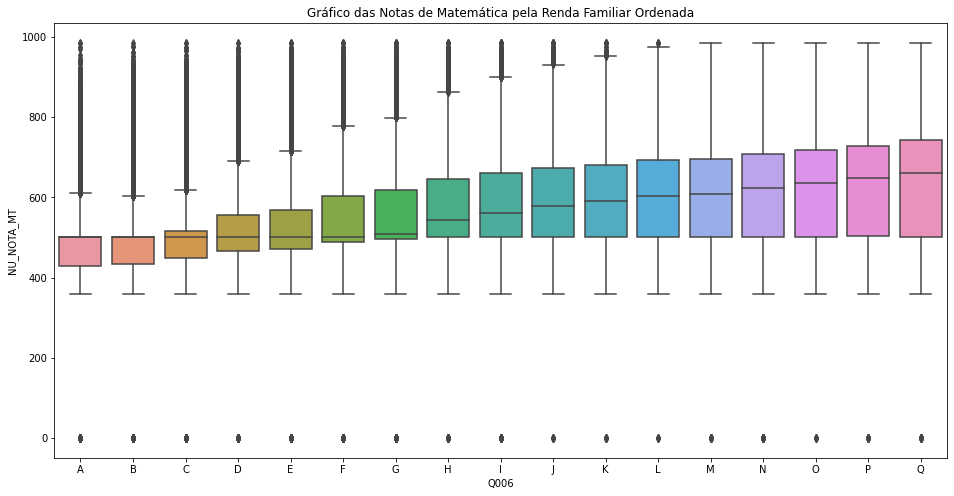

In [56]:
# Boxplot da Nota de Matemática pela Renda Ordenada (há evidência estatística de que quanto maior a 
# renda familiar maior foi Nota na Prova de Matemática )
plt.figure(figsize=(16,8))

sns.boxplot(x = 'Q006', y = 'NU_NOTA_MT', data = subset2, order = ordenamento_renda)
plt.title("Gráfico das Notas de Matemática pela Renda Familiar Ordenada");

In [62]:
subset2[notas].sum()

NU_NOTA_CN         2.424223e+09
NU_NOTA_CH         2.588497e+09
NU_NOTA_MT         2.634959e+09
NU_NOTA_LC         2.658838e+09
NU_NOTA_REDACAO    2.920687e+09
dtype: float64

In [63]:
subset2[notas].sum(axis=1)

0          2588.2
1          2588.2
2          2588.2
3          2376.7
4          3196.8
            ...  
5095265    2588.2
5095266    2605.8
5095267    2588.2
5095268    2588.2
5095269    2588.2
Length: 5095270, dtype: float64

In [64]:
subset2['NU_NOTA_TOTAL'] = subset2[notas].sum(axis=1)
subset2.head()

,SG_UF_RESIDENCIA,NU_IDADE,TP_SEXO,TP_ESTADO_CIVIL,TP_COR_RACA,TP_NACIONALIDADE,IN_CEGUEIRA,IN_GESTANTE,IN_LACTANTE,IN_IDOSO,...,NU_NOTA_MT,TP_LINGUA,NU_NOTA_REDACAO,Q006,Q025,TP_PRESENCA_MT,TP_PRESENCA_CH,TP_PRESENCA_CN,TP_PRESENCA_LC,NU_NOTA_TOTAL
0,SP,36.0,M,1,3,1,0,0,0,0,...,501.1,0,580.0,A,B,0,0,0,0,2588.2
1,BA,23.0,M,1,1,1,0,0,0,0,...,501.1,0,580.0,C,B,0,0,0,0,2588.2
2,CE,39.0,F,1,3,1,0,0,0,0,...,501.1,1,580.0,B,B,0,0,0,0,2588.2
3,TO,25.0,F,1,1,1,0,0,0,0,...,392.0,1,460.0,E,B,1,1,1,1,2376.7
4,MG,22.0,F,1,1,1,0,0,0,0,...,677.0,0,860.0,G,B,1,1,1,1,3196.8


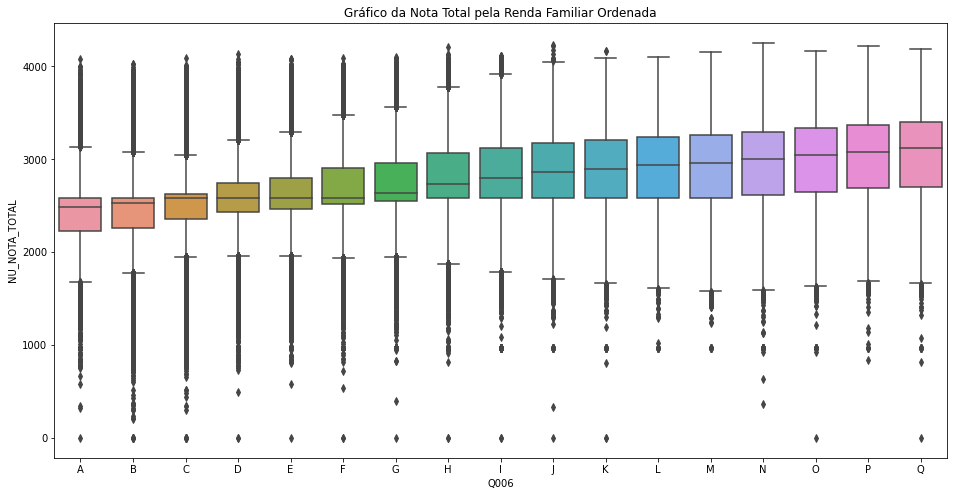

In [65]:
#Visualizando boxplot da Notal Total pela Renda Familiar Ordenada ((há evidência estatística de que quanto maior a 
# renda familiar maior foi Nota Total na prova do Enem-2019 ))
plt.figure(figsize=(16,8))

sns.boxplot(x='Q006', y = 'NU_NOTA_TOTAL', data = subset2, order = ordenamento_renda)
plt.title("Gráfico da Nota Total pela Renda Familiar Ordenada");

In [66]:
subset2.query('IN_CEGUEIRA == 1')['NU_NOTA_TOTAL'].value_counts().sort_index()

1373.3    1
1501.3    1
1527.6    1
1538.0    1
1562.7    1
         ..
3315.0    1
3437.0    1
3481.5    1
3491.7    1
3787.9    1
Name: NU_NOTA_TOTAL, Length: 563, dtype: int64

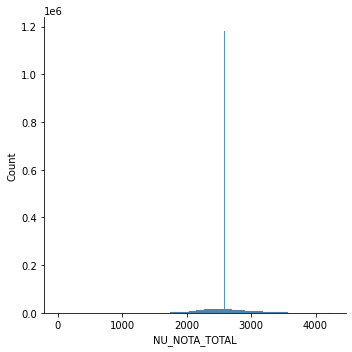

In [67]:
# Histograma de Nota Total
sns.displot(subset2, x = 'NU_NOTA_TOTAL');

In [70]:
#verificando a quantidade das notas zeros
subset2.query('NU_NOTA_TOTAL == 0').head()

,SG_UF_RESIDENCIA,NU_IDADE,TP_SEXO,TP_ESTADO_CIVIL,TP_COR_RACA,TP_NACIONALIDADE,IN_CEGUEIRA,IN_GESTANTE,IN_LACTANTE,IN_IDOSO,...,NU_NOTA_MT,TP_LINGUA,NU_NOTA_REDACAO,Q006,Q025,TP_PRESENCA_MT,TP_PRESENCA_CH,TP_PRESENCA_CN,TP_PRESENCA_LC,NU_NOTA_TOTAL
257940,PE,44.0,F,1,3,1,0,0,0,0,...,0.0,1,0.0,C,B,1,1,1,1,0.0
444922,PB,22.0,M,1,3,1,0,0,0,0,...,0.0,1,0.0,B,A,1,1,1,1,0.0
634713,PA,18.0,F,1,1,1,0,0,0,0,...,0.0,0,0.0,H,B,1,1,1,1,0.0
1034846,AM,18.0,M,1,1,1,0,0,0,0,...,0.0,1,0.0,B,A,1,1,1,1,0.0
1252333,PE,35.0,M,2,2,1,0,0,0,0,...,0.0,1,0.0,C,B,1,1,1,1,0.0


In [71]:
#Efetuando uma normalização
subset2.query('NU_NOTA_TOTAL == 0')['SG_UF_RESIDENCIA'].value_counts(normalize=True)

PE    0.129032
CE    0.129032
PA    0.096774
PB    0.064516
AM    0.064516
DF    0.064516
SP    0.064516
MG    0.064516
BA    0.064516
TO    0.064516
RS    0.032258
MA    0.032258
RJ    0.032258
PI    0.032258
AL    0.032258
MS    0.032258
Name: SG_UF_RESIDENCIA, dtype: float64

In [72]:
subset2.columns.values

array(['SG_UF_RESIDENCIA', 'NU_IDADE', 'TP_SEXO', 'TP_ESTADO_CIVIL',
       'TP_COR_RACA', 'TP_NACIONALIDADE', 'IN_CEGUEIRA', 'IN_GESTANTE',
       'IN_LACTANTE', 'IN_IDOSO', 'IN_NOME_SOCIAL', 'NU_NOTA_CN',
       'NU_NOTA_CH', 'NU_NOTA_LC', 'NU_NOTA_MT', 'TP_LINGUA',
       'NU_NOTA_REDACAO', 'Q006', 'Q025', 'TP_PRESENCA_MT',
       'TP_PRESENCA_CH', 'TP_PRESENCA_CN', 'TP_PRESENCA_LC',
       'NU_NOTA_TOTAL'], dtype=object)

In [73]:
# Expandindo o universo da verificação da Nota Total igual a zero para analisar com Renda Familiar
notas = ['NU_NOTA_CN', 'NU_NOTA_CH', 'NU_NOTA_MT', 'NU_NOTA_LC', 'NU_NOTA_REDACAO','Q006', 'Q025'] 
notas.append('NU_NOTA_TOTAL')
subset2[notas].query("NU_NOTA_TOTAL == 0")

,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_MT,NU_NOTA_LC,NU_NOTA_REDACAO,Q006,Q025,NU_NOTA_TOTAL
257940,0.0,0.0,0.0,0.0,0.0,C,B,0.0
444922,0.0,0.0,0.0,0.0,0.0,B,A,0.0
634713,0.0,0.0,0.0,0.0,0.0,H,B,0.0
1034846,0.0,0.0,0.0,0.0,0.0,B,A,0.0
1252333,0.0,0.0,0.0,0.0,0.0,C,B,0.0
1366351,0.0,0.0,0.0,0.0,0.0,K,B,0.0
1466062,0.0,0.0,0.0,0.0,0.0,B,B,0.0
1874305,0.0,0.0,0.0,0.0,0.0,J,B,0.0
1988203,0.0,0.0,0.0,0.0,0.0,I,B,0.0
2092696,0.0,0.0,0.0,0.0,0.0,K,B,0.0


In [74]:
#Criando um dataframe (subset) sem as notas zero
subset2_sem_notas_zero = subset2[notas].query("NU_NOTA_TOTAL != 0")
subset2_sem_notas_zero.head()

,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_MT,NU_NOTA_LC,NU_NOTA_REDACAO,Q006,Q025,NU_NOTA_TOTAL
0,470.3,510.6,501.1,526.2,580.0,A,B,2588.2
1,470.3,510.6,501.1,526.2,580.0,C,B,2588.2
2,470.3,510.6,501.1,526.2,580.0,B,B,2588.2
3,483.8,503.6,392.0,537.3,460.0,E,B,2376.7
4,513.6,575.5,677.0,570.7,860.0,G,B,3196.8


In [75]:
subset2_sem_notas_zero.columns.values

array(['NU_NOTA_CN', 'NU_NOTA_CH', 'NU_NOTA_MT', 'NU_NOTA_LC',
       'NU_NOTA_REDACAO', 'Q006', 'Q025', 'NU_NOTA_TOTAL'], dtype=object)

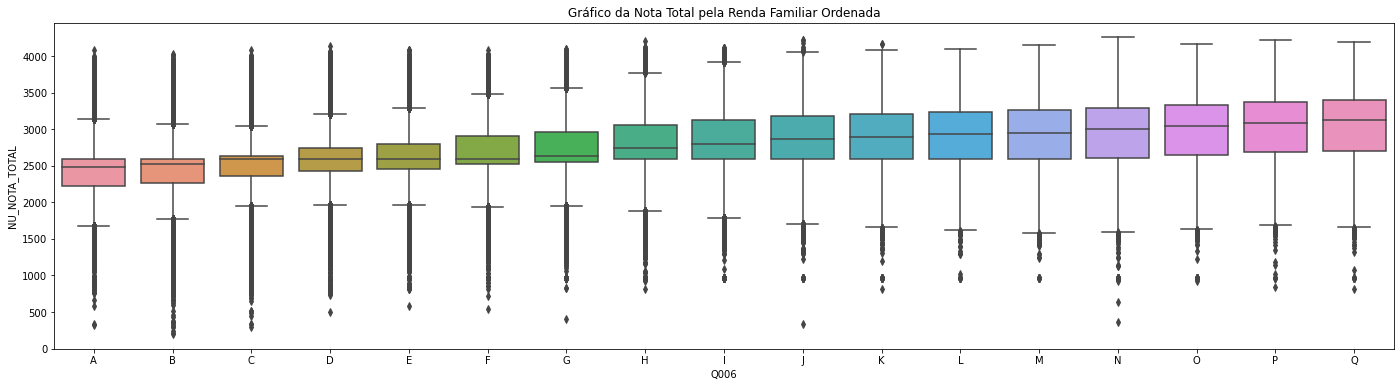

In [77]:
plt.figure(figsize=(24,6))

sns.boxplot(x = 'Q006', y = 'NU_NOTA_TOTAL', data = subset2_sem_notas_zero, order = ordenamento_renda)
plt.title('Gráfico da Nota Total pela Renda Familiar Ordenada');

In [87]:
round((subset2_sem_notas_zero)['NU_NOTA_TOTAL'].describe())

count    5095239.0
mean        2596.0
std          367.0
min          200.0
25%         2388.0
50%         2588.0
75%         2758.0
max         4254.0
Name: NU_NOTA_TOTAL, dtype: float64

<Figure size 1080x504 with 0 Axes>

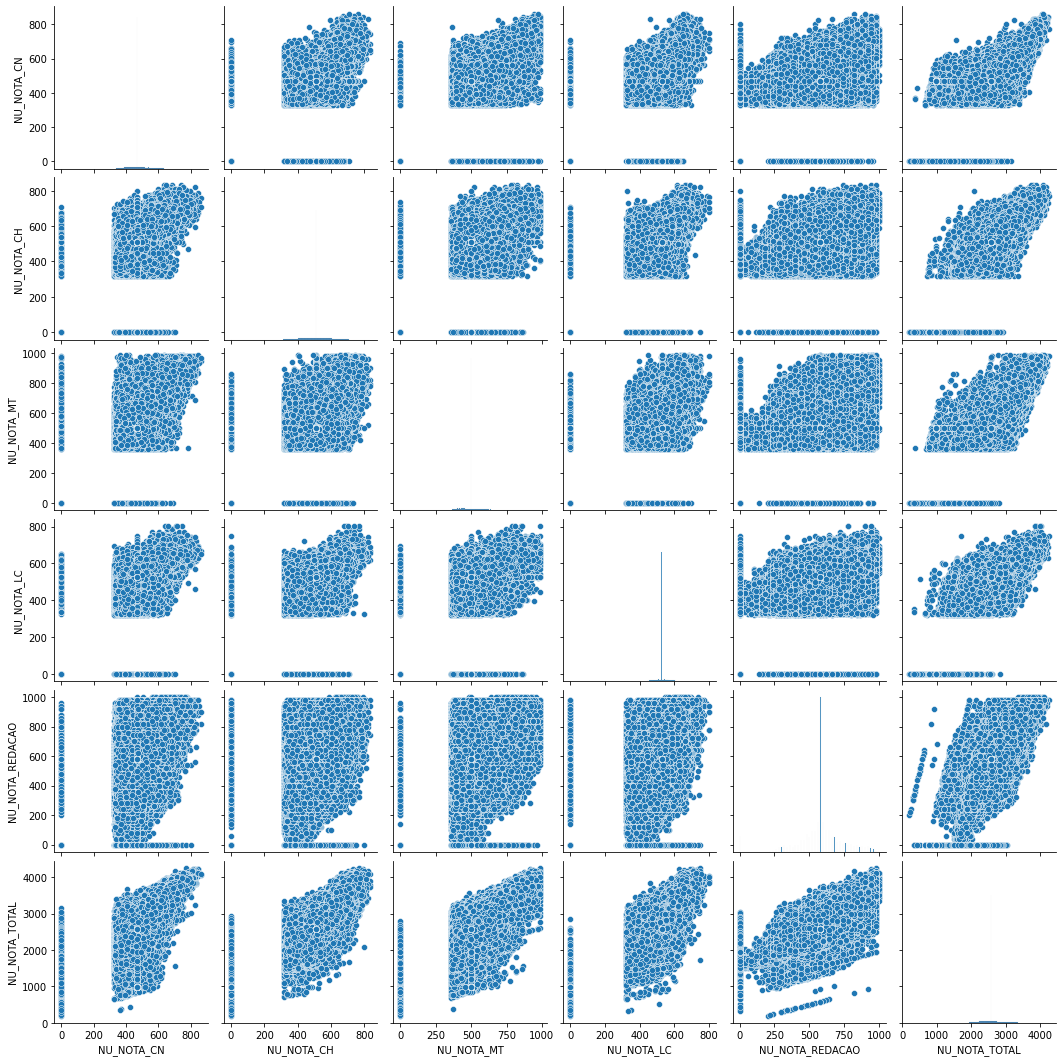

In [93]:
#Visualizando dispersão nas Notas de todas as Provas
plt.figure(figsize=(15,7))
sns.pairplot(subset2_sem_notas_zero[notas]);

In [94]:
#Verificando existência de correlação entre as Notas das Provas (correlação não significa causalidade)
correlacao = subset2_sem_notas_zero[notas].corr()
correlacao

,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_MT,NU_NOTA_LC,NU_NOTA_REDACAO,NU_NOTA_TOTAL
NU_NOTA_CN,1.000000,0.638744,0.648924,0.609052,0.476294,0.777233
NU_NOTA_CH,0.638744,1.000000,0.583020,0.745092,0.530229,0.812857
NU_NOTA_MT,0.648924,0.583020,1.000000,0.557512,0.468869,0.782315
NU_NOTA_LC,0.609052,0.745092,0.557512,1.000000,0.538890,0.793890
NU_NOTA_REDACAO,0.476294,0.530229,0.468869,0.538890,1.000000,0.842832
NU_NOTA_TOTAL,0.777233,0.812857,0.782315,0.793890,0.842832,1.000000


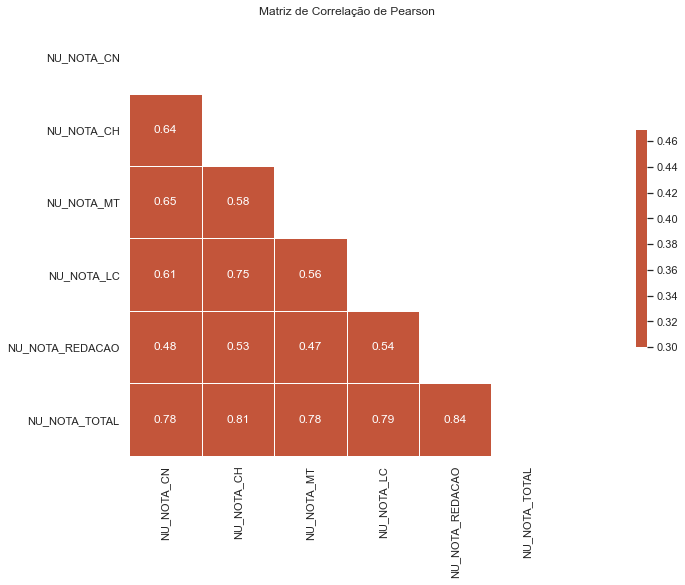

In [97]:
#plotando uma matrix de correlação em diagonal
import numpy as np
plt.figure(figsize = (26, 8))
sns.set_theme(style="white")
# Criando uma 'máscara' para o triângulo superior
mask = np.triu(np.ones_like(correlacao, dtype=bool))
# Criando um 'mapa' de cores personalizado
cmap = sns.diverging_palette(230, 20, as_cmap=True)
# Desenhando o mapa de calor com a 'máscara' na proporção correta
sns.heatmap(correlacao, mask=mask, cmap=cmap, vmax=.3, center=0, annot=True,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})
plt.title("Matriz de Correlação de Pearson");

# Construção de modelo para predição da Nota de Redação

In [100]:
#Obtendo os dados das Notas
dados_entrada = ['NU_NOTA_CN', 'NU_NOTA_CH', 'NU_NOTA_MT', 'NU_NOTA_LC'] 
                 
dados_saida = 'NU_NOTA_REDACAO'

subset2_sem_notas_zero = subset2_sem_notas_zero[notas].dropna()

x = subset2_sem_notas_zero[dados_entrada]  # input
y = subset2_sem_notas_zero[dados_saida] # output

In [101]:
#verificando as features de previsão
x

,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_MT,NU_NOTA_LC
0,470.3,510.6,501.1,526.2
1,470.3,510.6,501.1,526.2
2,470.3,510.6,501.1,526.2
3,483.8,503.6,392.0,537.3
4,513.6,575.5,677.0,570.7
...,...,...,...,...
5095265,470.3,510.6,501.1,526.2
5095266,470.3,578.9,501.1,555.5
5095267,470.3,510.6,501.1,526.2
5095268,470.3,510.6,501.1,526.2


In [102]:
#importando biblioteca para fazer a divisão do dataset
from sklearn.model_selection import train_test_split

x_treino, x_teste, y_treino, y_teste = train_test_split (x, y, test_size = 0.30, random_state=42)

In [103]:
x_treino.head()

,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_MT,NU_NOTA_LC
1494920,487.6,463.5,497.3,433.2
4665276,527.9,584.4,693.1,553.5
1004908,470.3,433.9,501.1,515.3
4269904,380.0,459.8,474.8,432.5
3934607,470.3,510.6,501.1,526.2


In [104]:
x_treino.shape

(3566667, 4)

In [105]:
len(y_treino)

3566667

In [106]:
x_teste.shape

(1528572, 4)

In [107]:
len(y_teste)

1528572

In [108]:
#importando biblioteca SVR de predição
from sklearn.svm import LinearSVR

modelo = LinearSVR(random_state=42)

modelo.fit(x_treino, y_treino)

LinearSVR(random_state=42)

In [109]:
pred_redacao = modelo.predict(x_teste)

In [110]:
y_teste[:5 ]

3526038    720.0
930517     320.0
3453887    580.0
2446268    460.0
1140201      0.0
Name: NU_NOTA_REDACAO, dtype: float64

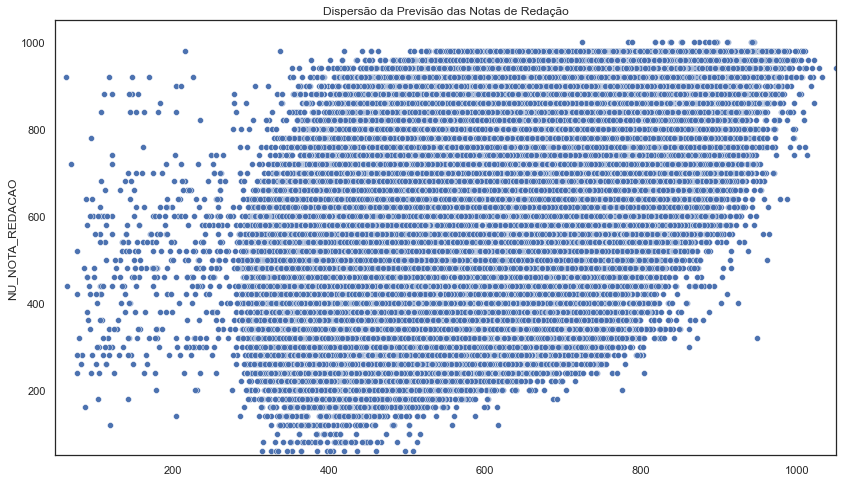

In [112]:
#Plotando um Gráfico mostrando dispersão da previsão
plt.figure(figsize = (14, 8))
sns.set_theme(style="white")
sns.scatterplot(x=pred_redacao, y=y_teste)
plt.xlim((50, 1050))
plt.ylim((50, 1050))
plt.title('Dispersão da Previsão das Notas de Redação');

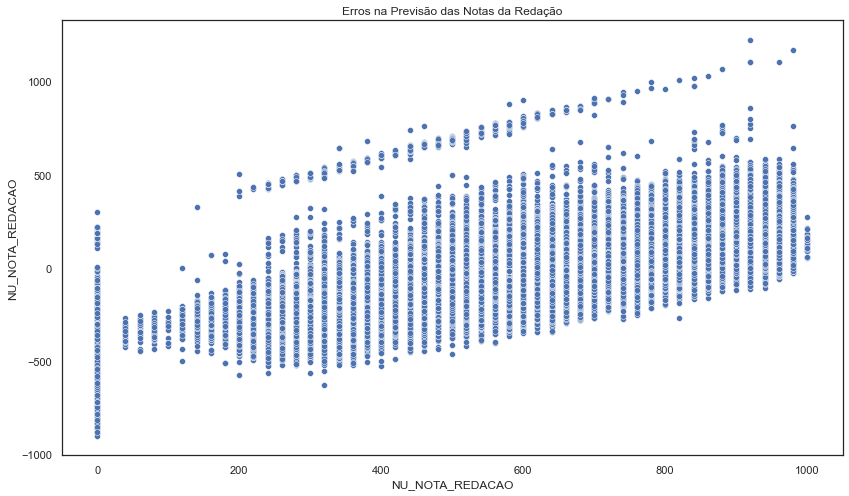

In [114]:
#Plotando Gráfico com erros verificado dispersão da previsão da Nota de Redação
plt.figure(figsize = (14, 8))
sns.set_theme(style="white")
sns.scatterplot(x=y_teste, y=(y_teste - pred_redacao))

plt.title('Erros na Previsão das Notas da Redação');

In [123]:
#usando função "dummy" para calcular erro médio quadrático
from sklearn.dummy import DummyRegressor

modelo_dummy = DummyRegressor()
modelo_dummy.fit(x_treino, y_treino)
dummy_predicoes = modelo_dummy.predict(x_teste)

In [124]:
from sklearn.metrics import mean_squared_error

mean_squared_error(y_teste, dummy_predicoes)

27413.18142470849

In [125]:
mean_squared_error(y_teste, pred_redacao)

18339.104341763155

In [126]:
# usando Decision Tree p construir um modelo
from sklearn.tree import DecisionTreeRegressor

modelo_arvore = DecisionTreeRegressor(max_depth = 3)
modelo_arvore.fit(x_treino, y_treino)
pred_redacao_arvore = modelo_arvore.predict(x_teste)
mean_squared_error(y_teste, pred_redacao_arvore)

18600.40179046009

In [127]:
# performance da previsão
forecast_tree = regressor_tree.predict(x_teste)

In [128]:
from sklearn.metrics import r2_score

In [129]:
#verificando o parametros
R_2 = r2_score(pred_redacao, forecast_tree)

print('Coeficiente de Determinação (R2):', R_2)

Coeficiente de Determinação (R2): 0.9999999999999993
